D:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\Anaconda\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


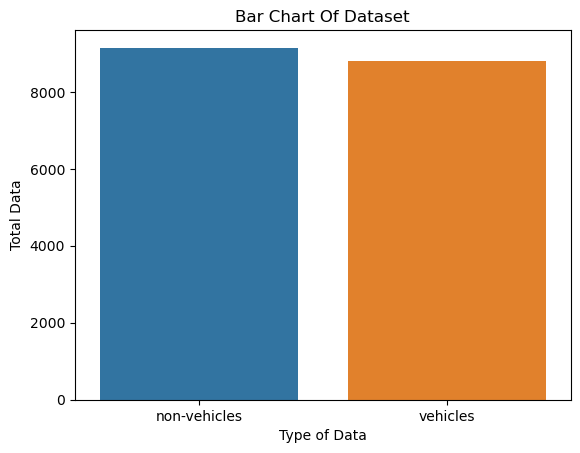

C:\Users\bhara\AppData\Local\Temp\ipykernel_25416\3681593331.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Total Images class [0]: {data_label[0]}")
C:\Users\bhara\AppData\Local\Temp\ipykernel_25416\3681593331.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Total Images class [1]: {data_label[1]}")


Total Images class [0]: 9146
Total Images class [1]: 8792
Found 11480 validated image filenames belonging to 2 classes.
Found 2870 validated image filenames belonging to 2 classes.
Found 3588 validated image filenames belonging to 2 classes.


In [1]:
import tensorflow as tf
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np

# Set your base directory
base_dir = "C:/Users/bhara/OneDrive/Desktop/Python_Materials/Neural Network/Assignment 2/data"

# 1. Read images and convert to dataframe
label = []       # Assign all label
images_path = [] # Get all images path
all_images = []  # Check all images name
img_label = []   # Assign image label

for directory in os.listdir(base_dir):
    label.append(directory)
    for img in os.listdir(os.path.join(base_dir, directory)):
        if img.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(os.path.join(base_dir, directory), img)
            all_images.append(img)
            images_path.append(img_path)
            img_label.append(directory)

# Convert to dataframe using pandas
data = pd.DataFrame({'image': images_path, 'label': img_label})

# Shuffle dataset distribution
data = data.sample(frac=1).reset_index()

# 2. Check Data Distribution
data_label = data['label'].value_counts()
plt.figure()
sns.barplot(x=data_label.index, y=data_label)
plt.xlabel("Type of Data")
plt.ylabel("Total Data")
plt.title("Bar Chart Of Dataset")
plt.show()
print(f"Total Images class [0]: {data_label[0]}")
print(f"Total Images class [1]: {data_label[1]}")

# 3. Split data to data training and data testing
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)

# 4. Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.1,
                                   rotation_range=25,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

# Implement data augmentation to training set, validation set, and test set
training_set = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col="image",
    y_col="label",
    target_size=(64, 64),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=2,
    subset="training")

validation_set = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col="image",
    y_col="label",
    target_size=(64, 64),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=2,
    subset="validation")

test_set = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col="image",
    y_col="label",
    target_size=(64, 64),
    color_mode="rgb",
    class_mode="categorical",
    shuffle=False,
    batch_size=32)

# 5. Transfer Learning Model using VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["acc"])



Epoch 1/10
359/359 [==============================] - 405s 1s/step - loss: 0.1138 - acc: 0.9541 - val_loss: 0.0630 - val_acc: 0.9784
Epoch 2/10
359/359 [==============================] - 335s 933ms/step - loss: 0.0650 - acc: 0.9774 - val_loss: 0.0371 - val_acc: 0.9864
Epoch 3/10
359/359 [==============================] - 346s 963ms/step - loss: 0.0545 - acc: 0.9794 - val_loss: 0.0546 - val_acc: 0.9787
Epoch 4/10
359/359 [==============================] - 354s 988ms/step - loss: 0.0472 - acc: 0.9842 - val_loss: 0.0403 - val_acc: 0.9871
Epoch 5/10
359/359 [==============================] - 350s 975ms/step - loss: 0.0435 - acc: 0.9849 - val_loss: 0.0538 - val_acc: 0.9787
Epoch 6/10
359/359 [==============================] - 352s 981ms/step - loss: 0.0376 - acc: 0.9859 - val_loss: 0.0344 - val_acc: 0.9868
Epoch 7/10
359/359 [==============================] - 361s 1s/step - loss: 0.0386 - acc: 0.9855 - val_loss: 0.0346 - val_acc: 0.9871
Epoch 8/10
359/359 [==============================] - 

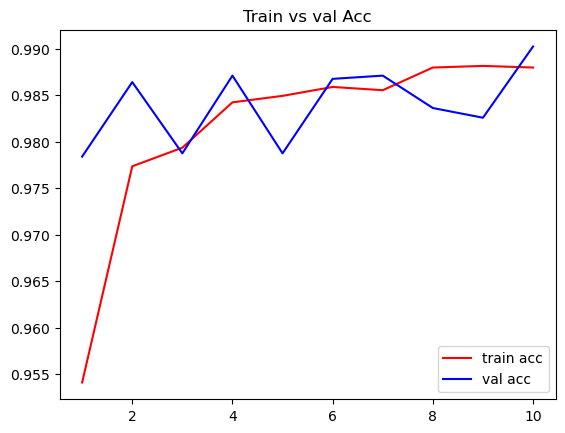

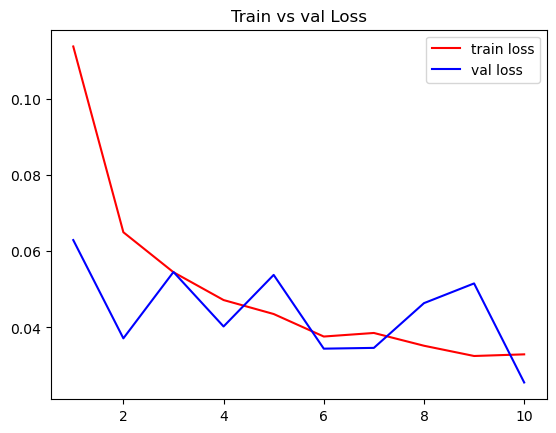

113/113 [==============================] - 87s 766ms/step - loss: 0.0229 - acc: 0.9928
Test Score: 0.9927536249160767
Test Loss: 0.022937415167689323
113/113 [==============================] - 89s 782ms/step
              precision    recall  f1-score   support

non-vehicles       1.00      0.99      0.99      1830
    vehicles       0.99      1.00      0.99      1758

    accuracy                           0.99      3588
   macro avg       0.99      0.99      0.99      3588
weighted avg       0.99      0.99      0.99      3588



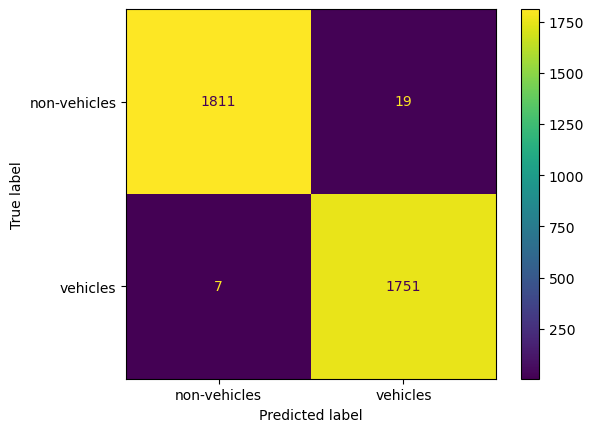

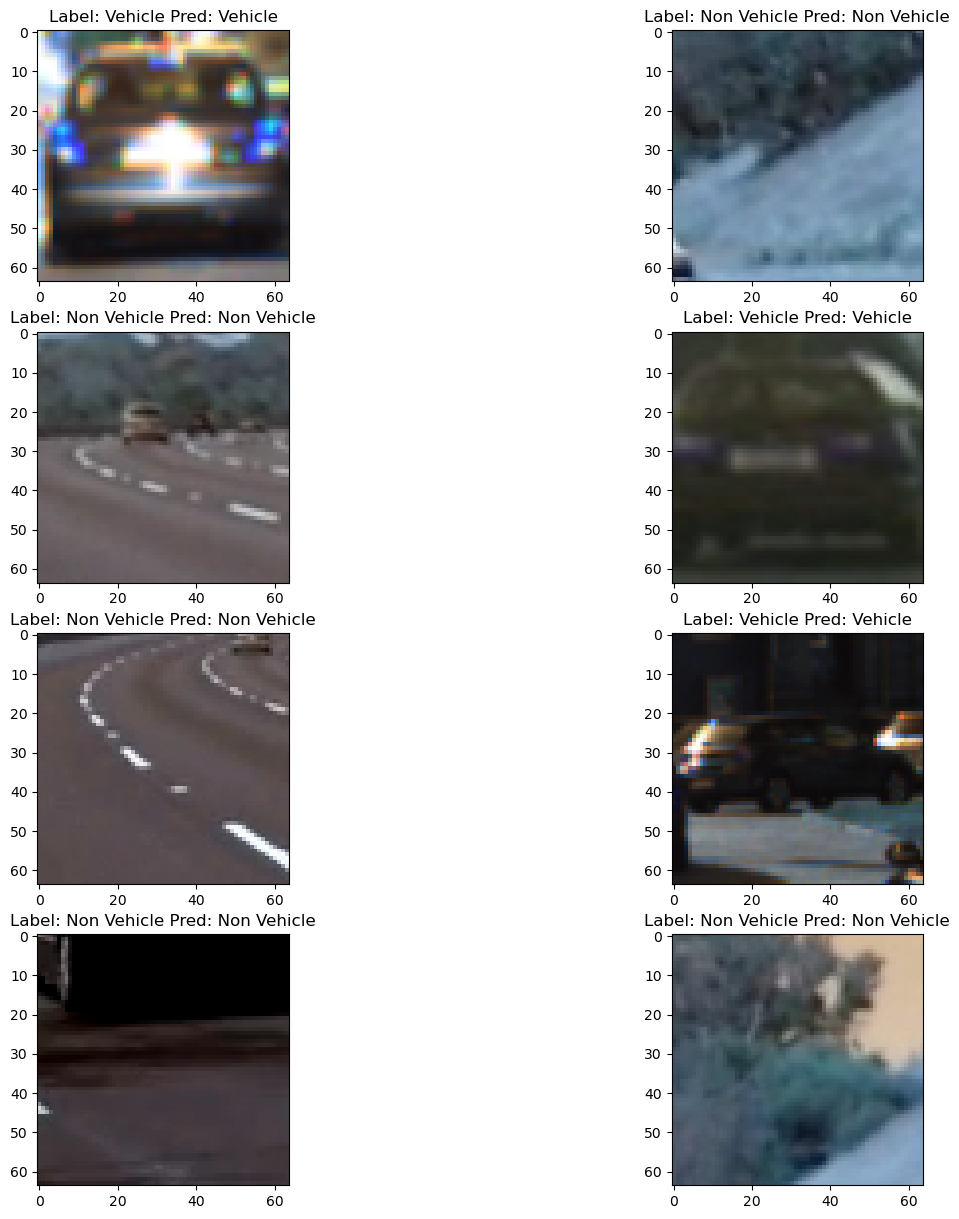

In [2]:
# 6. Train Model
history = model.fit(training_set, epochs=10, validation_data=validation_set, batch_size=32)

# 7. Evaluate Model
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history["loss"]
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc)+1)
plt.figure()
plt.title("Train vs val Acc")
plt.plot(epochs, train_acc, 'red', label="train acc")
plt.plot(epochs, val_acc, 'blue', label="val acc")
plt.legend()
plt.show()

plt.figure()
plt.title("Train vs val Loss")
plt.plot(epochs, train_loss, 'red', label="train loss")
plt.plot(epochs, val_loss, 'blue', label="val loss")
plt.legend()
plt.show()

# 8. Check accuracy from the test data
test_score = model.evaluate(test_set)

# Print accuracy scores
print(f'Test Score: {test_score[1]}')
print(f'Test Loss: {test_score[0]}')

# Convert predicted labels to array
predicted_label = model.predict(test_set)
predicted_label = np.argmax(predicted_label, axis=1)

# Convert test set labels to array
test_class = test_set.labels
test_class = np.array(test_class)

class_ind = test_set.class_indices
labels_id = list(class_ind.keys())

# Using Confusion Matrix and Classification Report To Evaluate The Model
confusion_data = confusion_matrix(test_class, predicted_label)

# Classification report
print(classification_report(test_class, predicted_label, target_names=labels_id))

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_data, display_labels=labels_id)
cm_display.plot()
plt.show()

# Check Predicted images and labels
test_datas = test_set.filenames
labels_data = test_set.labels

fig = plt.figure(figsize=(15, 15))
for i in range(8):
    if labels_data[i] == 0:
        test_label = "Non Vehicle"
    else:
        test_label = "Vehicle"
    if predicted_label[i] == 0:
        predict_lab = "Non Vehicle"
    else:
        predict_lab = "Vehicle"
    label = "Label: " + test_label + " Pred: " + predict_lab

    fig.add_subplot(4, 2, i+1).set_title(label)
    img = cv2.imread(test_datas[i])
    plt.imshow(img)

plt.show()

# # Save the model if needed
# model.save("transfer_learning_vehicle_classification_model.h5")


In [3]:
# Save the model if needed
model.save("transfer_learning_vehicle_classification_model.keras")

113/113 [==============================] - 87s 761ms/step - loss: 0.0229 - acc: 0.9928


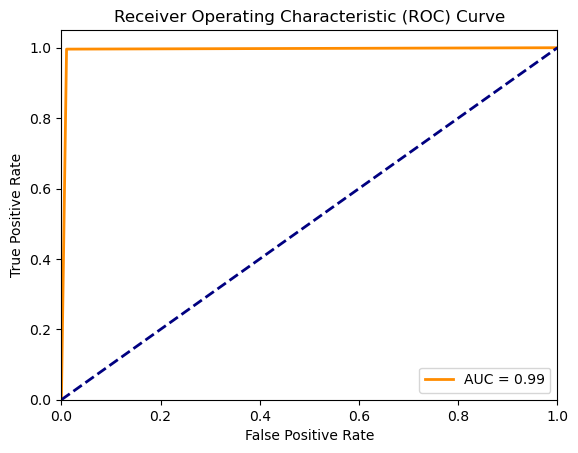

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ... (your existing code)

# 8. Check accuracy from the test data
test_score = model.evaluate(test_set)

# ... (your existing code)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(test_class, predicted_label)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()